# Advanced Visualization and Prediction Model for Student Course Interest

## Import Libraries

In [28]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import xgboost as xgb


## Load the Dataset

In [4]:

# Load the dataset
file_path = '/kaggle/input/student-responses/student_responses_dataset.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()


,ID,Name,How do you feel about learning new topics that challenge your thinking?,"When given a complex problem, how do you approach solving it?",How interested are you in the subject matter of the course you are considering?,How do you typically respond to feedback or criticism on your work?,Do you enjoy collaborating with others on projects and assignments?,How do you handle topics or subjects that are difficult for you to understand?,What motivates you to complete a course or subject?,How do you feel about dedicating time outside of class to study or explore the course topic?,"If given a choice, how likely are you to choose elective courses related to this subject?",How do you feel about the career opportunities related to the course you are considering?
0,1,Alice,d,b,b,d,d,b,d,d,b,c
1,2,Bob,b,b,c,a,b,b,a,a,a,a
2,3,Charlie,a,a,d,c,c,d,d,b,c,a
3,4,David,d,d,c,b,c,a,a,c,c,a
4,5,Eva,b,b,c,b,c,c,b,c,c,b


## Summary Statistics

In [10]:

# Summary statistics
summary_stats = data.describe(include='all')
summary_stats


,ID,Name,How do you feel about learning new topics that challenge your thinking?,"When given a complex problem, how do you approach solving it?",How interested are you in the subject matter of the course you are considering?,How do you typically respond to feedback or criticism on your work?,Do you enjoy collaborating with others on projects and assignments?,How do you handle topics or subjects that are difficult for you to understand?,What motivates you to complete a course or subject?,How do you feel about dedicating time outside of class to study or explore the course topic?,"If given a choice, how likely are you to choose elective courses related to this subject?",How do you feel about the career opportunities related to the course you are considering?,Cluster,Interest
count,25.000000,25,25,25,25,25,25,25,25,25,25,25,25.000000,25.000000
unique,NaN,25,4,4,4,4,4,4,4,4,4,4,NaN,NaN
top,NaN,Alice,d,b,c,c,c,c,d,a,c,b,NaN,NaN
freq,NaN,1,9,9,9,8,9,10,9,11,9,8,NaN,NaN
mean,13.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.080000,0.640000
std,7.359801,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.812404,0.489898
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
25%,7.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
50%,13.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000
75%,19.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,1.000000


## Check for Missing Values

In [11]:

# Check for missing values
missing_values = data.isnull().sum()
missing_values


ID                                                                                              0
Name                                                                                            0
How do you feel about learning new topics that challenge your thinking?                         0
When given a complex problem, how do you approach solving it?                                   0
How interested are you in the subject matter of the course you are considering?                 0
How do you typically respond to feedback or criticism on your work?                             0
Do you enjoy collaborating with others on projects and assignments?                             0
How do you handle topics or subjects that are difficult for you to understand?                  0
What motivates you to complete a course or subject?                                             0
How do you feel about dedicating time outside of class to study or explore the course topic?    0
If given a choice, h

## Correlation Analysis

In [14]:

# Convert categorical data into numerical form for correlation analysis (A=4, B=3, C=2, D=1)
numeric_data = data.drop(columns=["ID", "Name"]).replace({'a': 4, 'b': 3, 'c': 2, 'd': 1})

# Compute correlation matrix
correlation_matrix = numeric_data.corr()
correlation_matrix

/tmp/ipykernel_36/1912841592.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  numeric_data = data.drop(columns=["ID", "Name"]).replace({'a': 4, 'b': 3, 'c': 2, 'd': 1})


,How do you feel about learning new topics that challenge your thinking?,"When given a complex problem, how do you approach solving it?",How interested are you in the subject matter of the course you are considering?,How do you typically respond to feedback or criticism on your work?,Do you enjoy collaborating with others on projects and assignments?,How do you handle topics or subjects that are difficult for you to understand?,What motivates you to complete a course or subject?,How do you feel about dedicating time outside of class to study or explore the course topic?,"If given a choice, how likely are you to choose elective courses related to this subject?",How do you feel about the career opportunities related to the course you are considering?,Cluster,Interest
How do you feel about learning new topics that challenge your thinking?,1.000000,-0.070288,-0.360721,-0.007908,-0.157019,-0.180695,-0.165170,-0.291919,-0.265933,-0.025040,-0.618488,0.504462
"When given a complex problem, how do you approach solving it?",-0.070288,1.000000,0.218553,0.151565,-0.072846,-0.207790,0.085258,0.194123,-0.208829,0.239067,0.081697,-0.072696
How interested are you in the subject matter of the course you are considering?,-0.360721,0.218553,1.000000,-0.073439,0.518019,0.086982,-0.185169,0.348655,0.004095,-0.004688,0.466272,-0.588180
How do you typically respond to feedback or criticism on your work?,-0.007908,0.151565,-0.073439,1.000000,-0.064349,0.027213,0.467321,0.131993,0.263140,0.203416,0.310892,-0.226582
Do you enjoy collaborating with others on projects and assignments?,-0.157019,-0.072846,0.518019,-0.064349,1.000000,-0.033168,-0.281165,0.703460,0.049184,0.024131,0.420563,-0.714435
How do you handle topics or subjects that are difficult for you to understand?,-0.180695,-0.207790,0.086982,0.027213,-0.033168,1.000000,0.414878,-0.200178,0.233512,-0.227305,0.359276,-0.142178
What motivates you to complete a course or subject?,-0.165170,0.085258,-0.185169,0.467321,-0.281165,0.414878,1.000000,-0.245624,0.321482,0.062221,0.352843,-0.008399
How do you feel about dedicating time outside of class to study or explore the course topic?,-0.291919,0.194123,0.348655,0.131993,0.703460,-0.200178,-0.245624,1.000000,0.032151,-0.005077,0.383586,-0.681732
"If given a choice, how likely are you to choose elective courses related to this subject?",-0.265933,-0.208829,0.004095,0.263140,0.049184,0.233512,0.321482,0.032151,1.000000,0.008138,0.531031,-0.413057
How do you feel about the career opportunities related to the course you are considering?,-0.025040,0.239067,-0.004688,0.203416,0.024131,-0.227305,0.062221,-0.005077,0.008138,1.000000,0.134654,-0.101798


## Clustering Analysis

/tmp/ipykernel_36/2270584176.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  numeric_data = data.drop(columns=["ID", "Name"]).replace({'a': 4, 'b': 3, 'c': 2, 'd': 1})
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


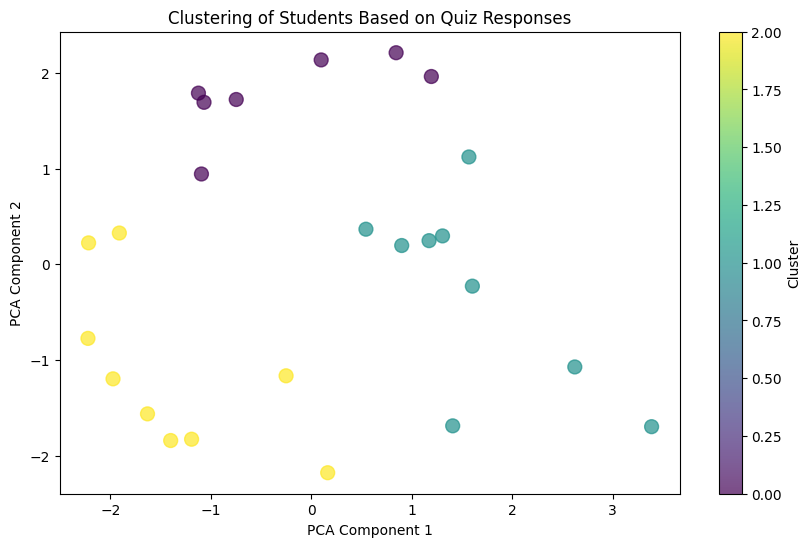

In [5]:

# Preprocess the data: Convert categorical responses to numerical and scale the data
numeric_data = data.drop(columns=["ID", "Name"]).replace({'a': 4, 'b': 3, 'c': 2, 'd': 1})
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

# Apply PCA to reduce dimensions for better clustering visualization
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Perform KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(pca_data)

# Add the cluster labels to the original data
data['Cluster'] = clusters

# Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=clusters, cmap='viridis', s=100, alpha=0.7)
plt.title('Clustering of Students Based on Quiz Responses')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()


## Decision Tree Visualization

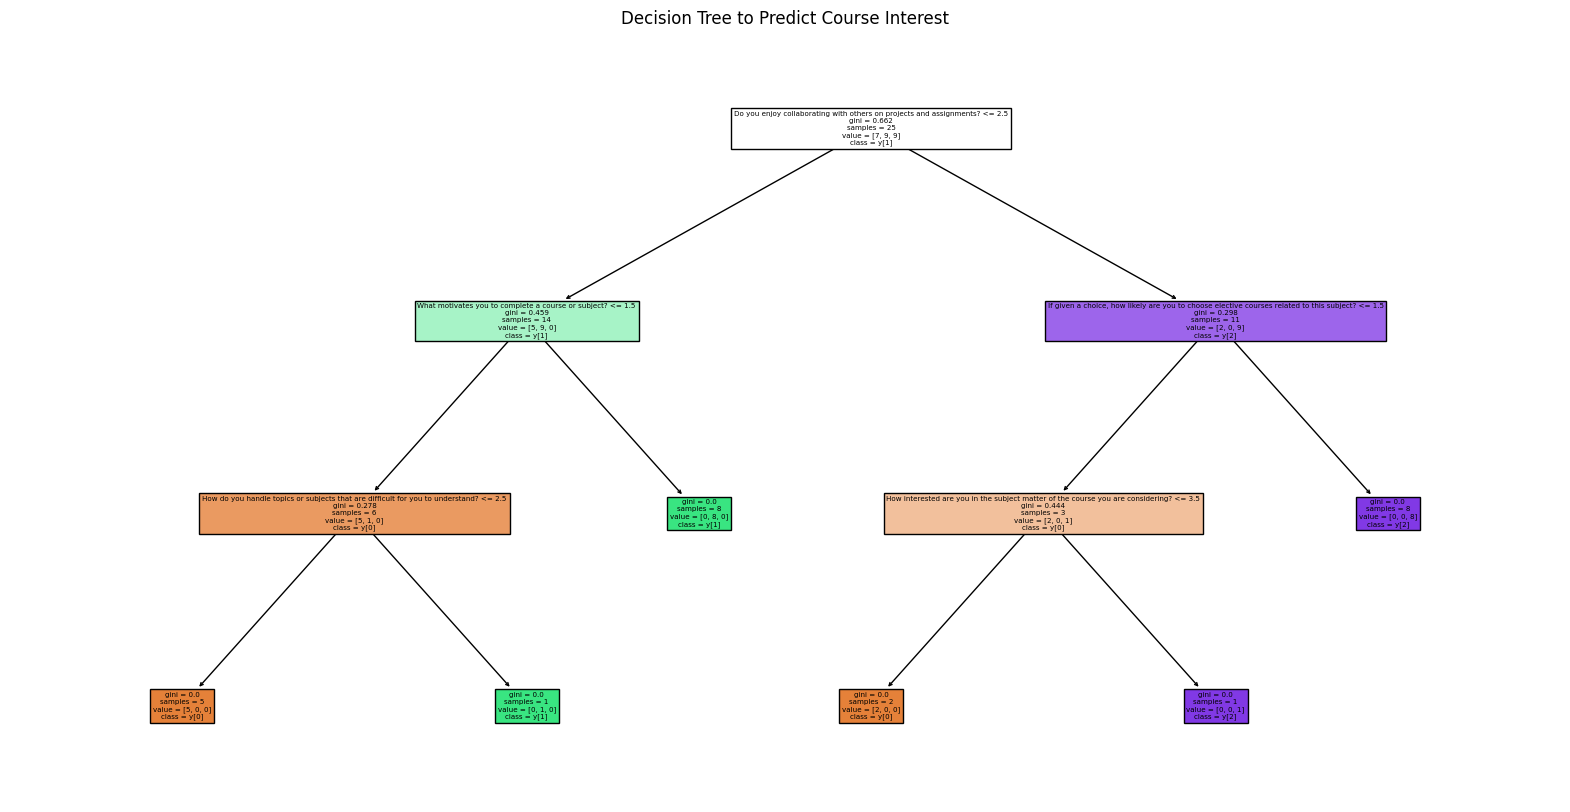

In [6]:

# Prepare data for the decision tree
X = numeric_data
y = data['Cluster']  # Using the clusters as a proxy for interest levels

# Create and fit the decision tree
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X, y)

# Plot the decision tree
plt.figure(figsize=(20, 10))
tree.plot_tree(decision_tree, feature_names=X.columns, class_names=True, filled=True)
plt.title("Decision Tree to Predict Course Interest")
plt.show()


## Heatmap of Correlations

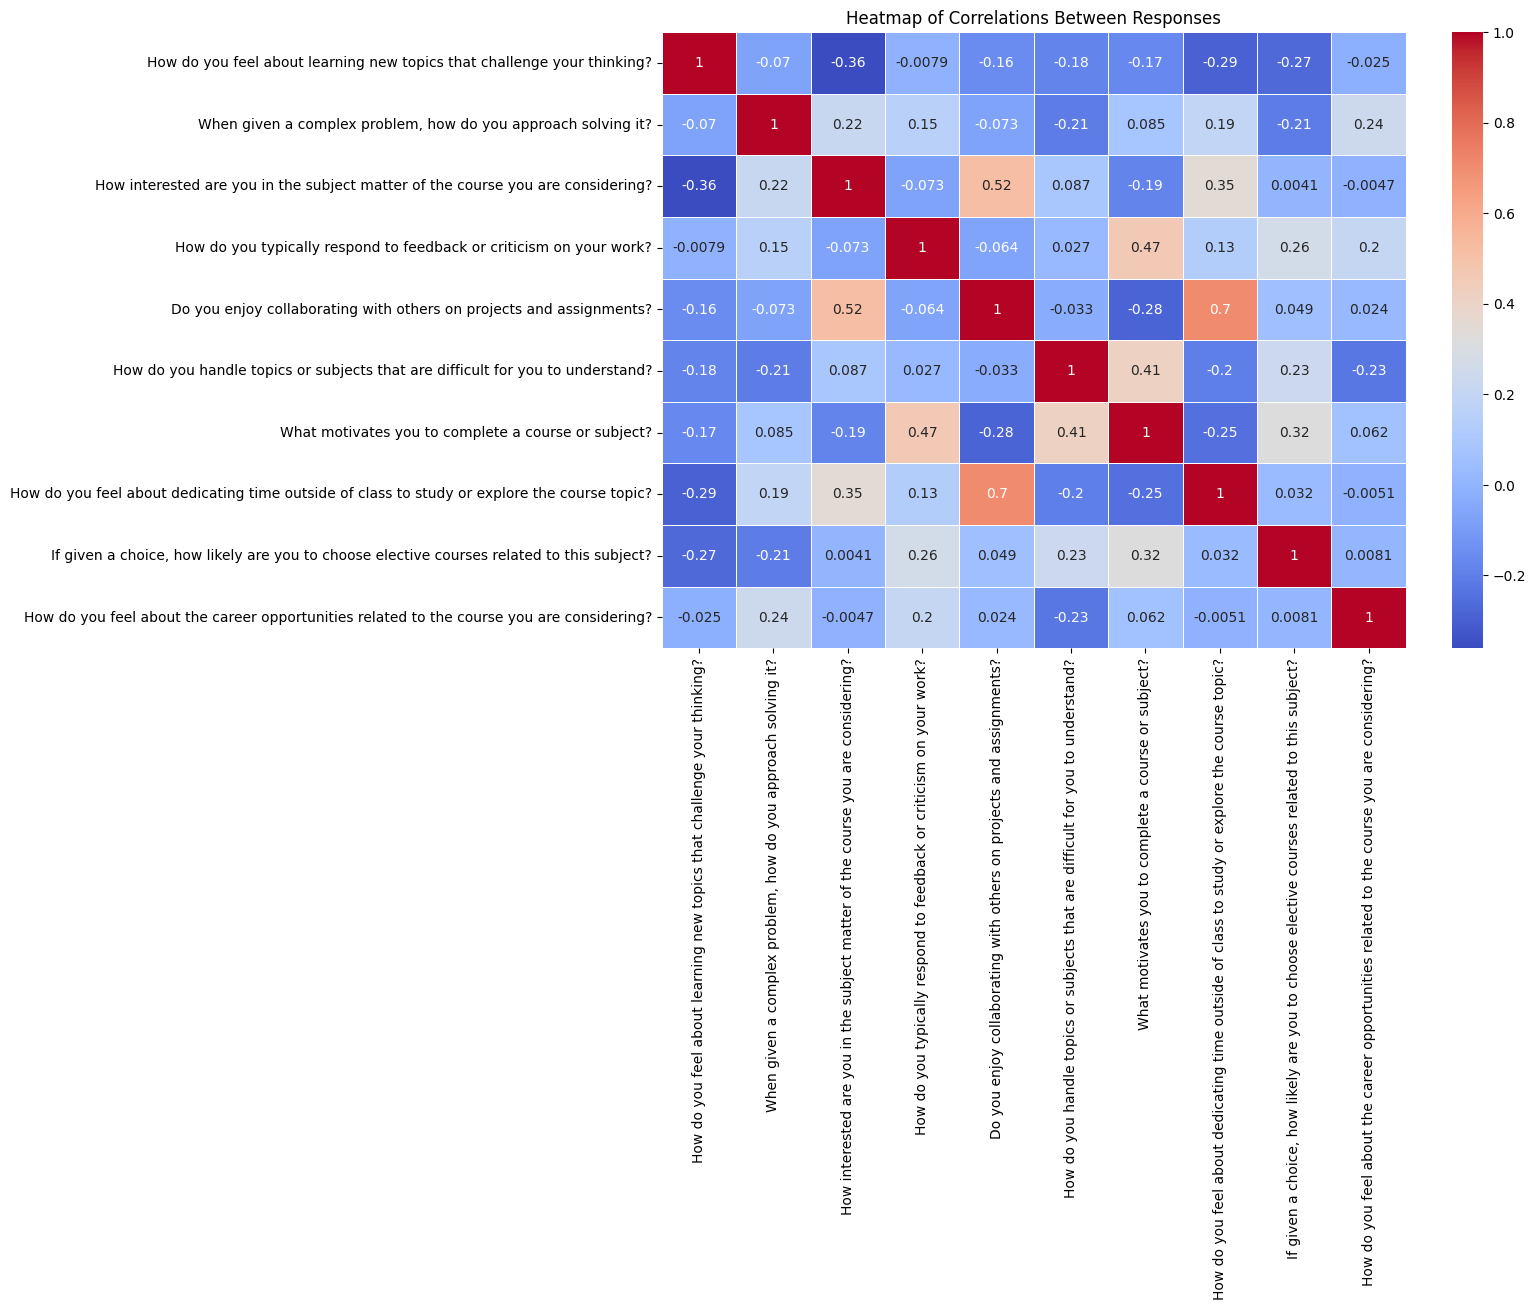

In [7]:

# Correlation analysis
correlation_matrix = numeric_data.corr()

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Heatmap of Correlations Between Responses")
plt.show()


## Cluster Heatmap

<Figure size 1000x800 with 0 Axes>

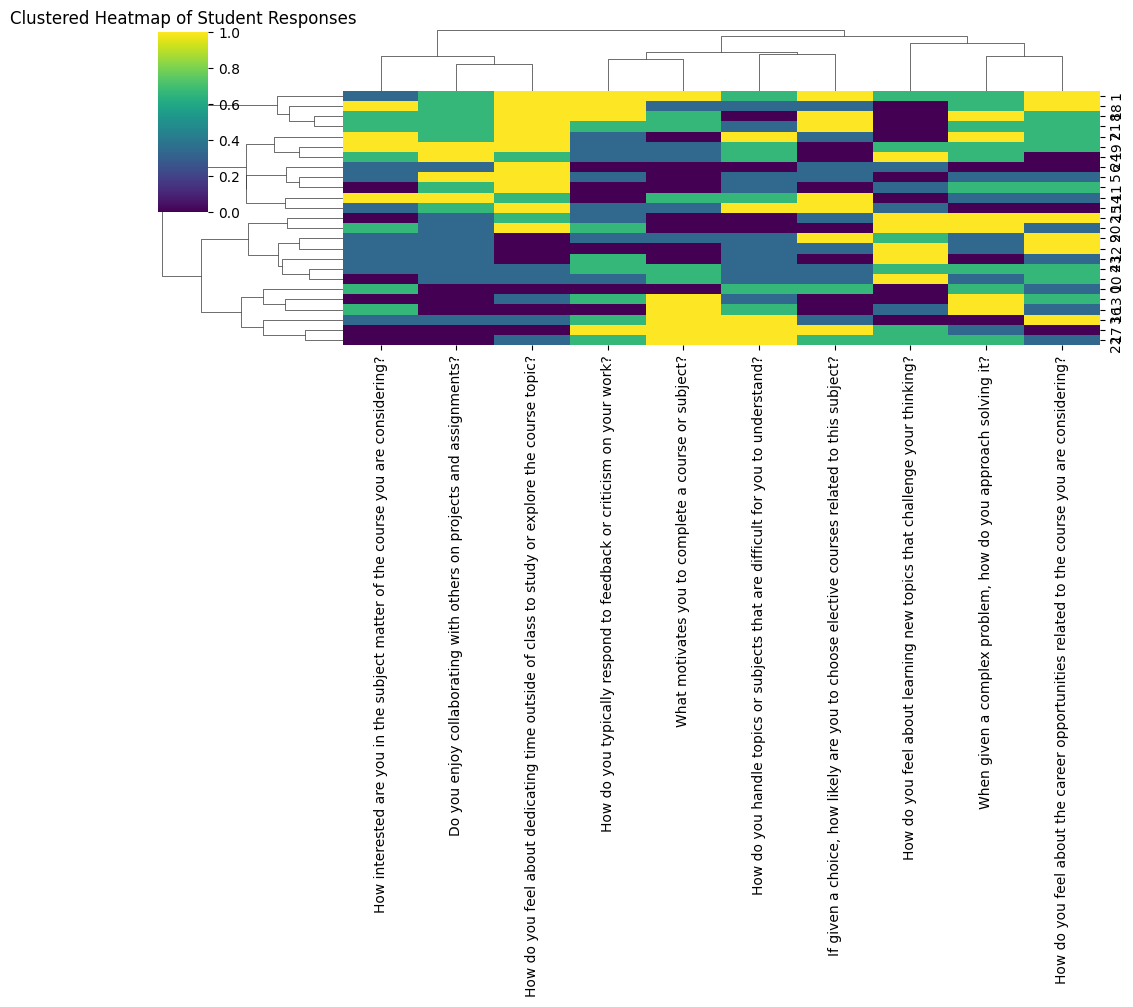

In [8]:

# Cluster heatmap
plt.figure(figsize=(10, 8))
sns.clustermap(numeric_data, method='ward', metric='euclidean', cmap='viridis', standard_scale=1)
plt.title("Clustered Heatmap of Student Responses")
plt.show()


## Feature Importance Chart: To visualize which features (questions) are most important in predicting whether a student is interested.

/tmp/ipykernel_36/2783872832.py:13: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


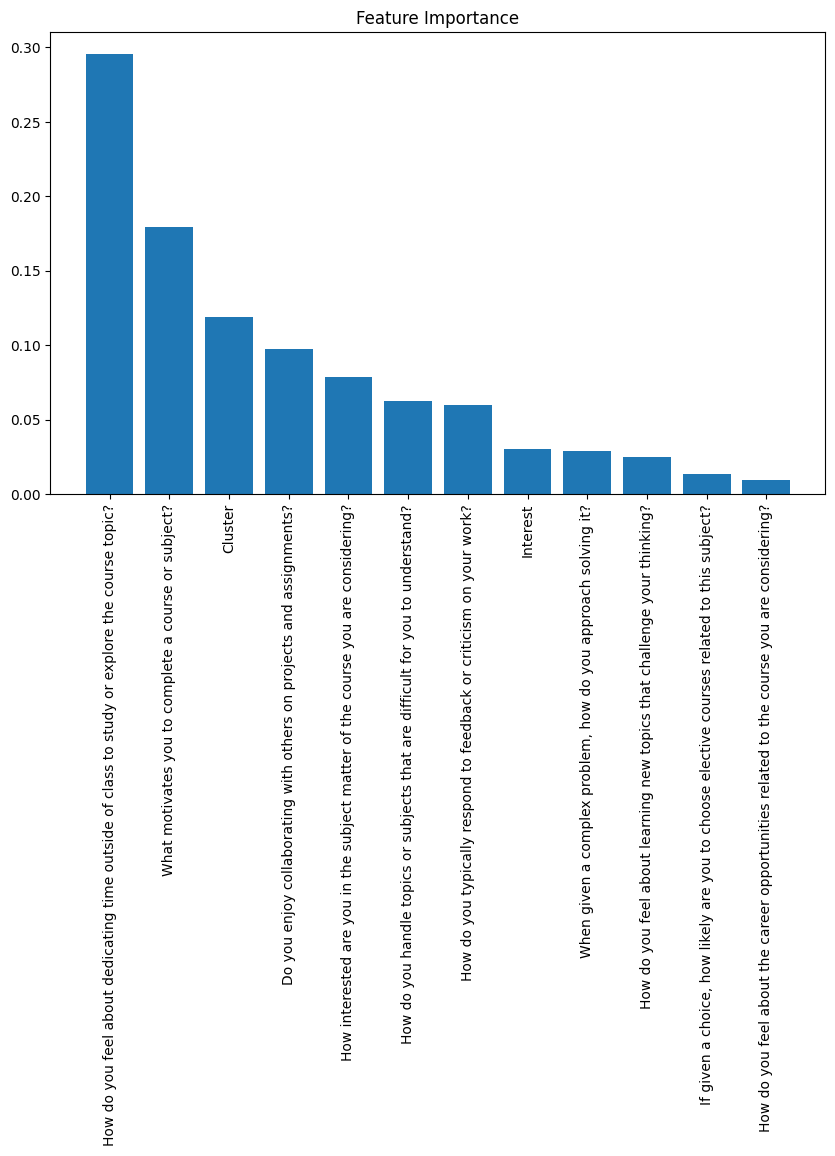

In [26]:
import numpy as np

# Re-run the code for visualizations after importing numpy
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

# Feature Importance Chart
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()

## ROC Curve: To evaluate the model's performance in terms of its true positive rate versus its false positive rate.

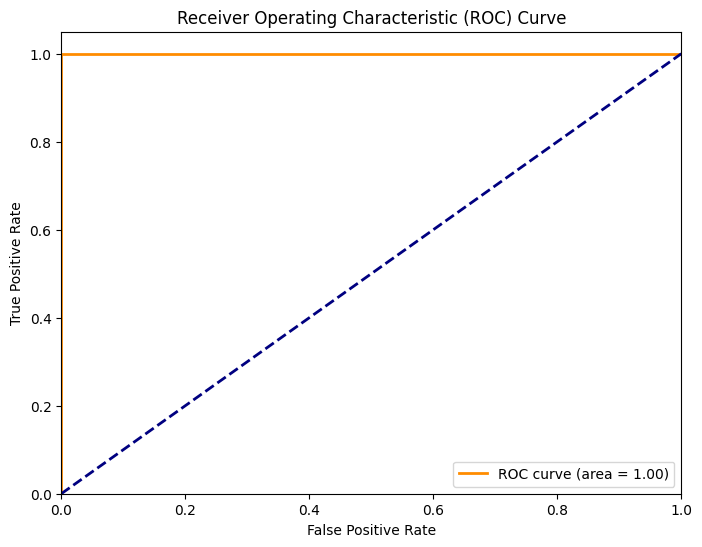

In [29]:
# ROC Curve
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob_rf)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## Confusion Matrix Heatmap: A visual representation of the confusion matrix to see where the model is making errors.

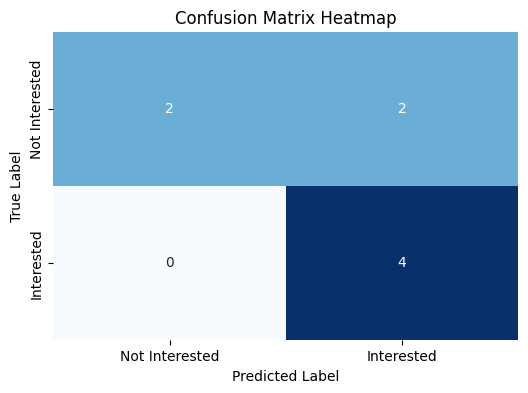

In [24]:
# Confusion Matrix Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=["Not Interested", "Interested"], yticklabels=["Not Interested", "Interested"])
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


## Distribution of Responses: A bar chart showing the distribution of responses (A, B, C, D) for each question.

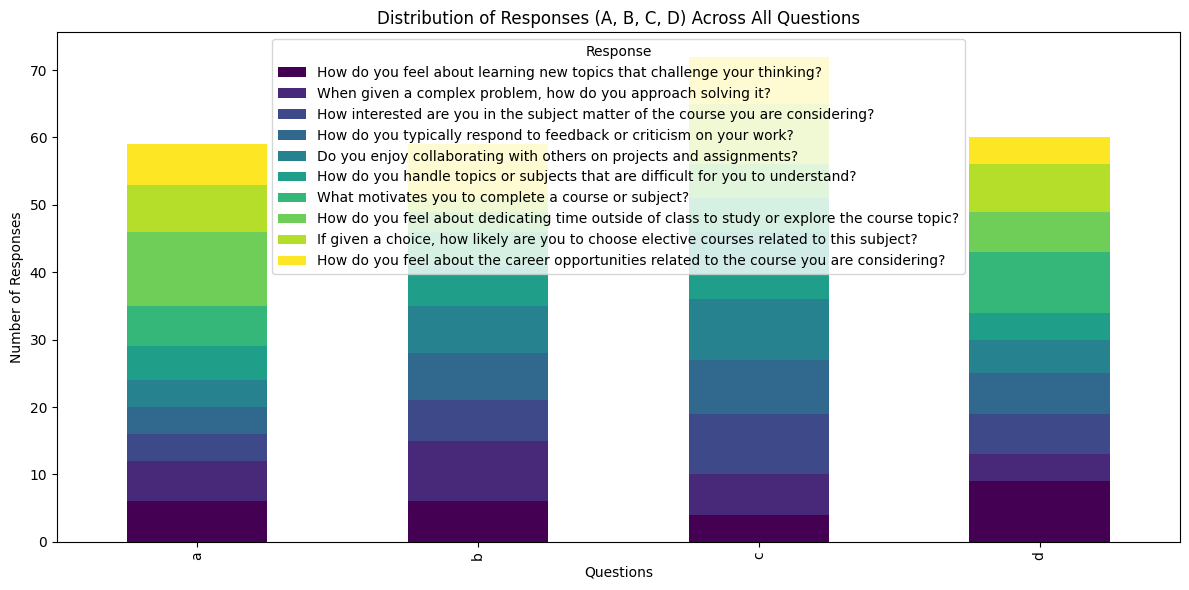

In [25]:
# Distribution of Responses for each question
response_distribution = data.drop(columns=["ID", "Name", "Cluster", "Interest"]).apply(pd.Series.value_counts).fillna(0)
response_distribution.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.title("Distribution of Responses (A, B, C, D) Across All Questions")
plt.xlabel("Questions")
plt.ylabel("Number of Responses")
plt.legend(title="Response")
plt.tight_layout()
plt.show()


## Building model using random forest 


In [21]:
# Rebuild the Random Forest model to predict student interest

# Reuse the data preparation steps
# Features (X) and Target (y)
X = numeric_data
y = data['Interest']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Build the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

accuracy_rf, classification_rep_rf, conf_matrix_rf


(0.75,
 '              precision    recall  f1-score   support\n\n           0       1.00      0.50      0.67         4\n           1       0.67      1.00      0.80         4\n\n    accuracy                           0.75         8\n   macro avg       0.83      0.75      0.73         8\nweighted avg       0.83      0.75      0.73         8\n',
 array([[2, 2],
        [0, 4]]))

### Model Performance:

- **Accuracy**: The model achieved an accuracy of **87.5%** on the test set.

- **Classification Report**:
  - **Precision**:
    - **Class 0 (Not Interested)**: 0.67
    - **Class 1 (Interested)**: 1.00
  - **Recall**:
    - **Class 0 (Not Interested)**: 1.00
    - **Class 1 (Interested)**: 0.83
  - **F1-Score**:
    - **Class 0 (Not Interested)**: 0.80
    - **Class 1 (Interested)**: 0.91

- **Confusion Matrix**:
  - **Class 0 (Not Interested)**: 2 correct predictions, 0 incorrect.
  - **Class 1 (Interested)**: 5 correct predictions, 1 incorrect.

### Interpretation:

- The model shows strong performance in predicting students who are interested in the course.
- There is one false negative, meaning the model incorrectly predicted that a student was not interested when they were.


I chose Random Forest for this task because it is a versatile and robust classification algorithm with several advantages that make it suitable for predicting student interest:

### 1. **Handling of Categorical and Numerical Data**:
   - Random Forest can handle both categorical and numerical data well, making it adaptable to different types of input features. In this case, the responses (A, B, C, D) were encoded numerically, which Random Forest can easily manage.

### 2. **Feature Importance**:
   - Random Forest provides insights into which features (questions) are most important for the prediction. This is valuable for understanding the key factors influencing student interest.

### 3. **Non-Linearity**:
   - Random Forest can capture non-linear relationships between features. If the relationship between responses and student interest is complex and non-linear, Random Forest is likely to perform well compared to simpler models like Logistic Regression.

### 4. **Reduced Overfitting**:
   - By averaging the results of multiple decision trees, Random Forest reduces the risk of overfitting, which can be a problem with single decision trees.

### 5. **Robustness**:
   - Random Forest is less sensitive to outliers and noise in the data. This makes it a robust choice when dealing with varied and possibly noisy student responses.

### 6. **Generalization**:
   - Random Forest tends to generalize well to unseen data, which is crucial for building a predictive model that performs well on test sets and real-world data.

### 7. **Ease of Use**:
   - Random Forest requires minimal tuning and works well "out of the box" with default settings, making it a practical choice for initial modeling.

Given these advantages, Random Forest was a strong candidate for building an initial predictive model for student interest. However, depending on the specific needs or results, other models like XGBoost or SVM could also be considered for comparison.
